In [1]:
import pandas as pd 
import numpy as np 
import pylab as plt

In [2]:
data = pd.read_csv("overall_avg.csv",index_col=0)
data.head()

,E_avg,H_avg,S_avg
p_325,13373.166667,24111.444444,17375.055556
p_328,41560.944444,15811.500000,17919.055556
p_329,19559.055556,32532.000000,11588.888889
p_330,26513.611111,20561.944444,15315.555556
p_335,17652.888889,36185.055556,13351.500000


In [3]:
E_avg = data["E_avg"]
H_avg = data["H_avg"]
S_avg = data["S_avg"]
S_avg = S_avg[~np.isnan(S_avg)]

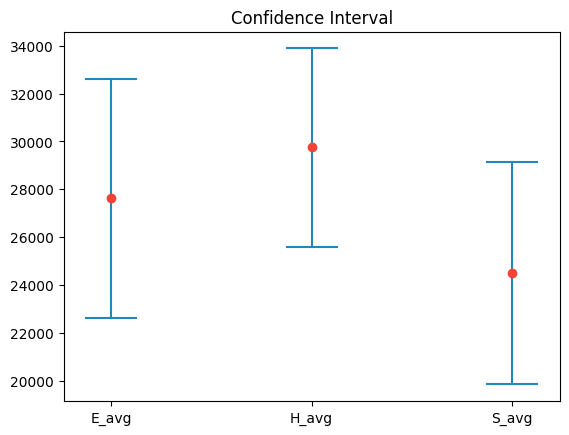

In [4]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.25):
    mean = values.mean()
    stdev = values.std()
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color='#f44336')

    return mean, confidence_interval


plt.xticks([1, 2, 3], ['E_avg', 'H_avg', 'S_avg'])
plt.title('Confidence Interval')
plot_confidence_interval(1, E_avg)
plot_confidence_interval(2, H_avg)
plot_confidence_interval(3, S_avg)
plt.show()

In [5]:
new_data = dict()
c = 0
for val in E_avg:
    new_data[c] = dict()
    new_data[c]["value"] = val
    new_data[c]["group"] = "E"
    c += 1

for val in H_avg:
    new_data[c] = dict()    
    new_data[c]["value"] = val
    new_data[c]["group"] = "H"
    c += 1
    
for val in S_avg:
    new_data[c] = dict()    
    new_data[c]["value"] = val
    new_data[c]["group"] = "S"
    c += 1

new_df = pd.DataFrame(new_data).transpose()
new_df.head()

,value,group
0,13373.166667,E
1,41560.944444,E
2,19559.055556,E
3,26513.611111,E
4,17652.888889,E


In [6]:
new_df.to_csv("overall_avg.csv")

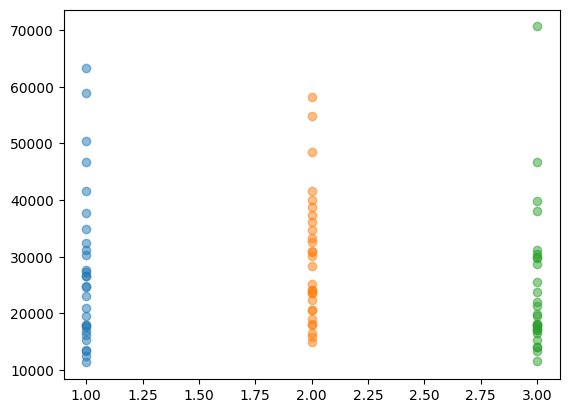

In [7]:
plt.clf()
plt.scatter([1] * len(E_avg), E_avg, alpha=0.5)
plt.scatter([2] * len(H_avg), H_avg, alpha=0.5)
plt.scatter([3] * len(S_avg), S_avg, alpha=0.5)